In [1]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import shap
from sklearn.metrics import mean_squared_error

In [2]:
with open('best_model.pkl', 'rb') as f:
    model = pickle.load(f)

/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Lasso from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:20:48] WARNING: /Users/runner/work/xgboost/xgboost/src/gbm/gbtree.cc:388: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
  warnings.warn(smsg, UserWarning)
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [00:20:48] WARNING: /Users/runner/work/xgboost/xgboost/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


In [3]:
splits = Path('./splits')

In [4]:
X_train = pd.read_csv(splits / 'X_train.csv')

In [5]:
X_valid = pd.read_csv(splits / 'X_valid.csv')

In [6]:
X_test = pd.read_csv(splits / 'X_test.csv')

In [7]:
y_train = pd.read_csv(splits / 'y_train.csv')

In [8]:
y_valid = pd.read_csv(splits / 'y_valid.csv')

In [9]:
y_test = pd.read_csv(splits / 'y_test.csv')

In [10]:
for df in [X_train, X_valid, X_test, y_train, y_valid, y_test]:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
model

XGBOnLinReg(alpha=3.1, device='gpu', learning_rate=0.08, max_depth=5,
            n_estimators=433, subsample=0.8)

In [12]:
xgb_reg = model.xgb_reg

In [13]:
feature_importances = xgb_reg.feature_importances_

In [14]:
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

date: 0.0009165744413621724
lon_rounded_up: 0.009907472878694534
lat_rounded_up: 0.007601269520819187
o2: 0.10859549790620804
chl: 0.07391136139631271
no3: 0.07957975566387177
po4: 0.0915706604719162
si: 0.08622734993696213
salinity: 0.022817552089691162
temp: 0.11925031244754791
elevation: 0.020502496510744095
chl_lag_1: 0.0015245814574882388
no3_lag_1: 0.0010586901335045695
po4_lag_1: 0.0023693835828453302
si_lag_1: 0.009422015398740768
salinity_lag_1: 0.0026547403540462255
temp_lag_1: 0.0019236502703279257
o2_lag_1: 0.002008232055231929
chl_lag_2: 0.001591601874679327
no3_lag_2: 0.0007978216744959354
po4_lag_2: 0.001586817903444171
si_lag_2: 0.00254969485104084
salinity_lag_2: 0.00176243856549263
temp_lag_2: 0.0014574456727132201
o2_lag_2: 0.000917786150239408
chl_lag_3: 0.0015935974661260843
no3_lag_3: 0.0006678677746094763
po4_lag_3: 0.0009195799357257783
si_lag_3: 0.0015288317808881402
salinity_lag_3: 0.002092065755277872
temp_lag_3: 0.001065460848622024
o2_lag_3: 0.0009218684281

/var/folders/h9/7qb3ygvs0mzb0cdjbh8z8svr0000gn/T/ipykernel_24557/3410413288.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(X_train.columns, fontsize=6)


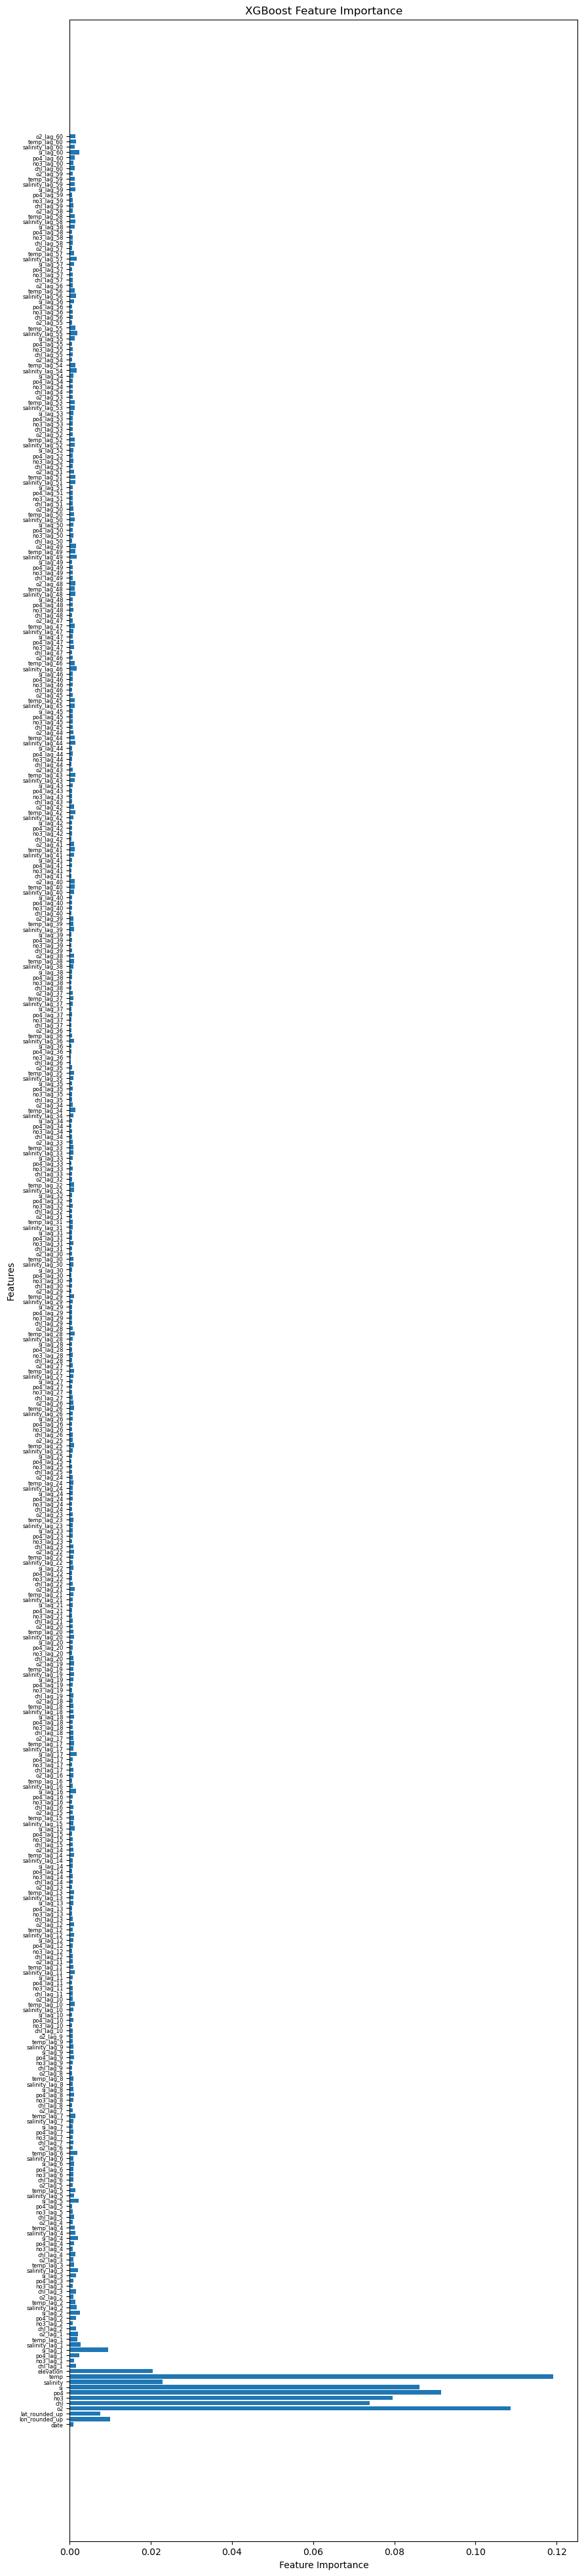

In [15]:
fig, ax = plt.subplots(figsize=(10,50))
ax.barh(X_train.columns, feature_importances)
ax.set_xlabel("Feature Importance")
ax.set_ylabel("Features")
ax.set_title("XGBoost Feature Importance")
ax.set_yticklabels(X_train.columns, fontsize=6)
plt.show()

In [16]:
np.random.seed(42)

In [17]:
n = len(y_test)-1

/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/alexanderrasmussen/miniconda3/envs/deeplearn/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso wa

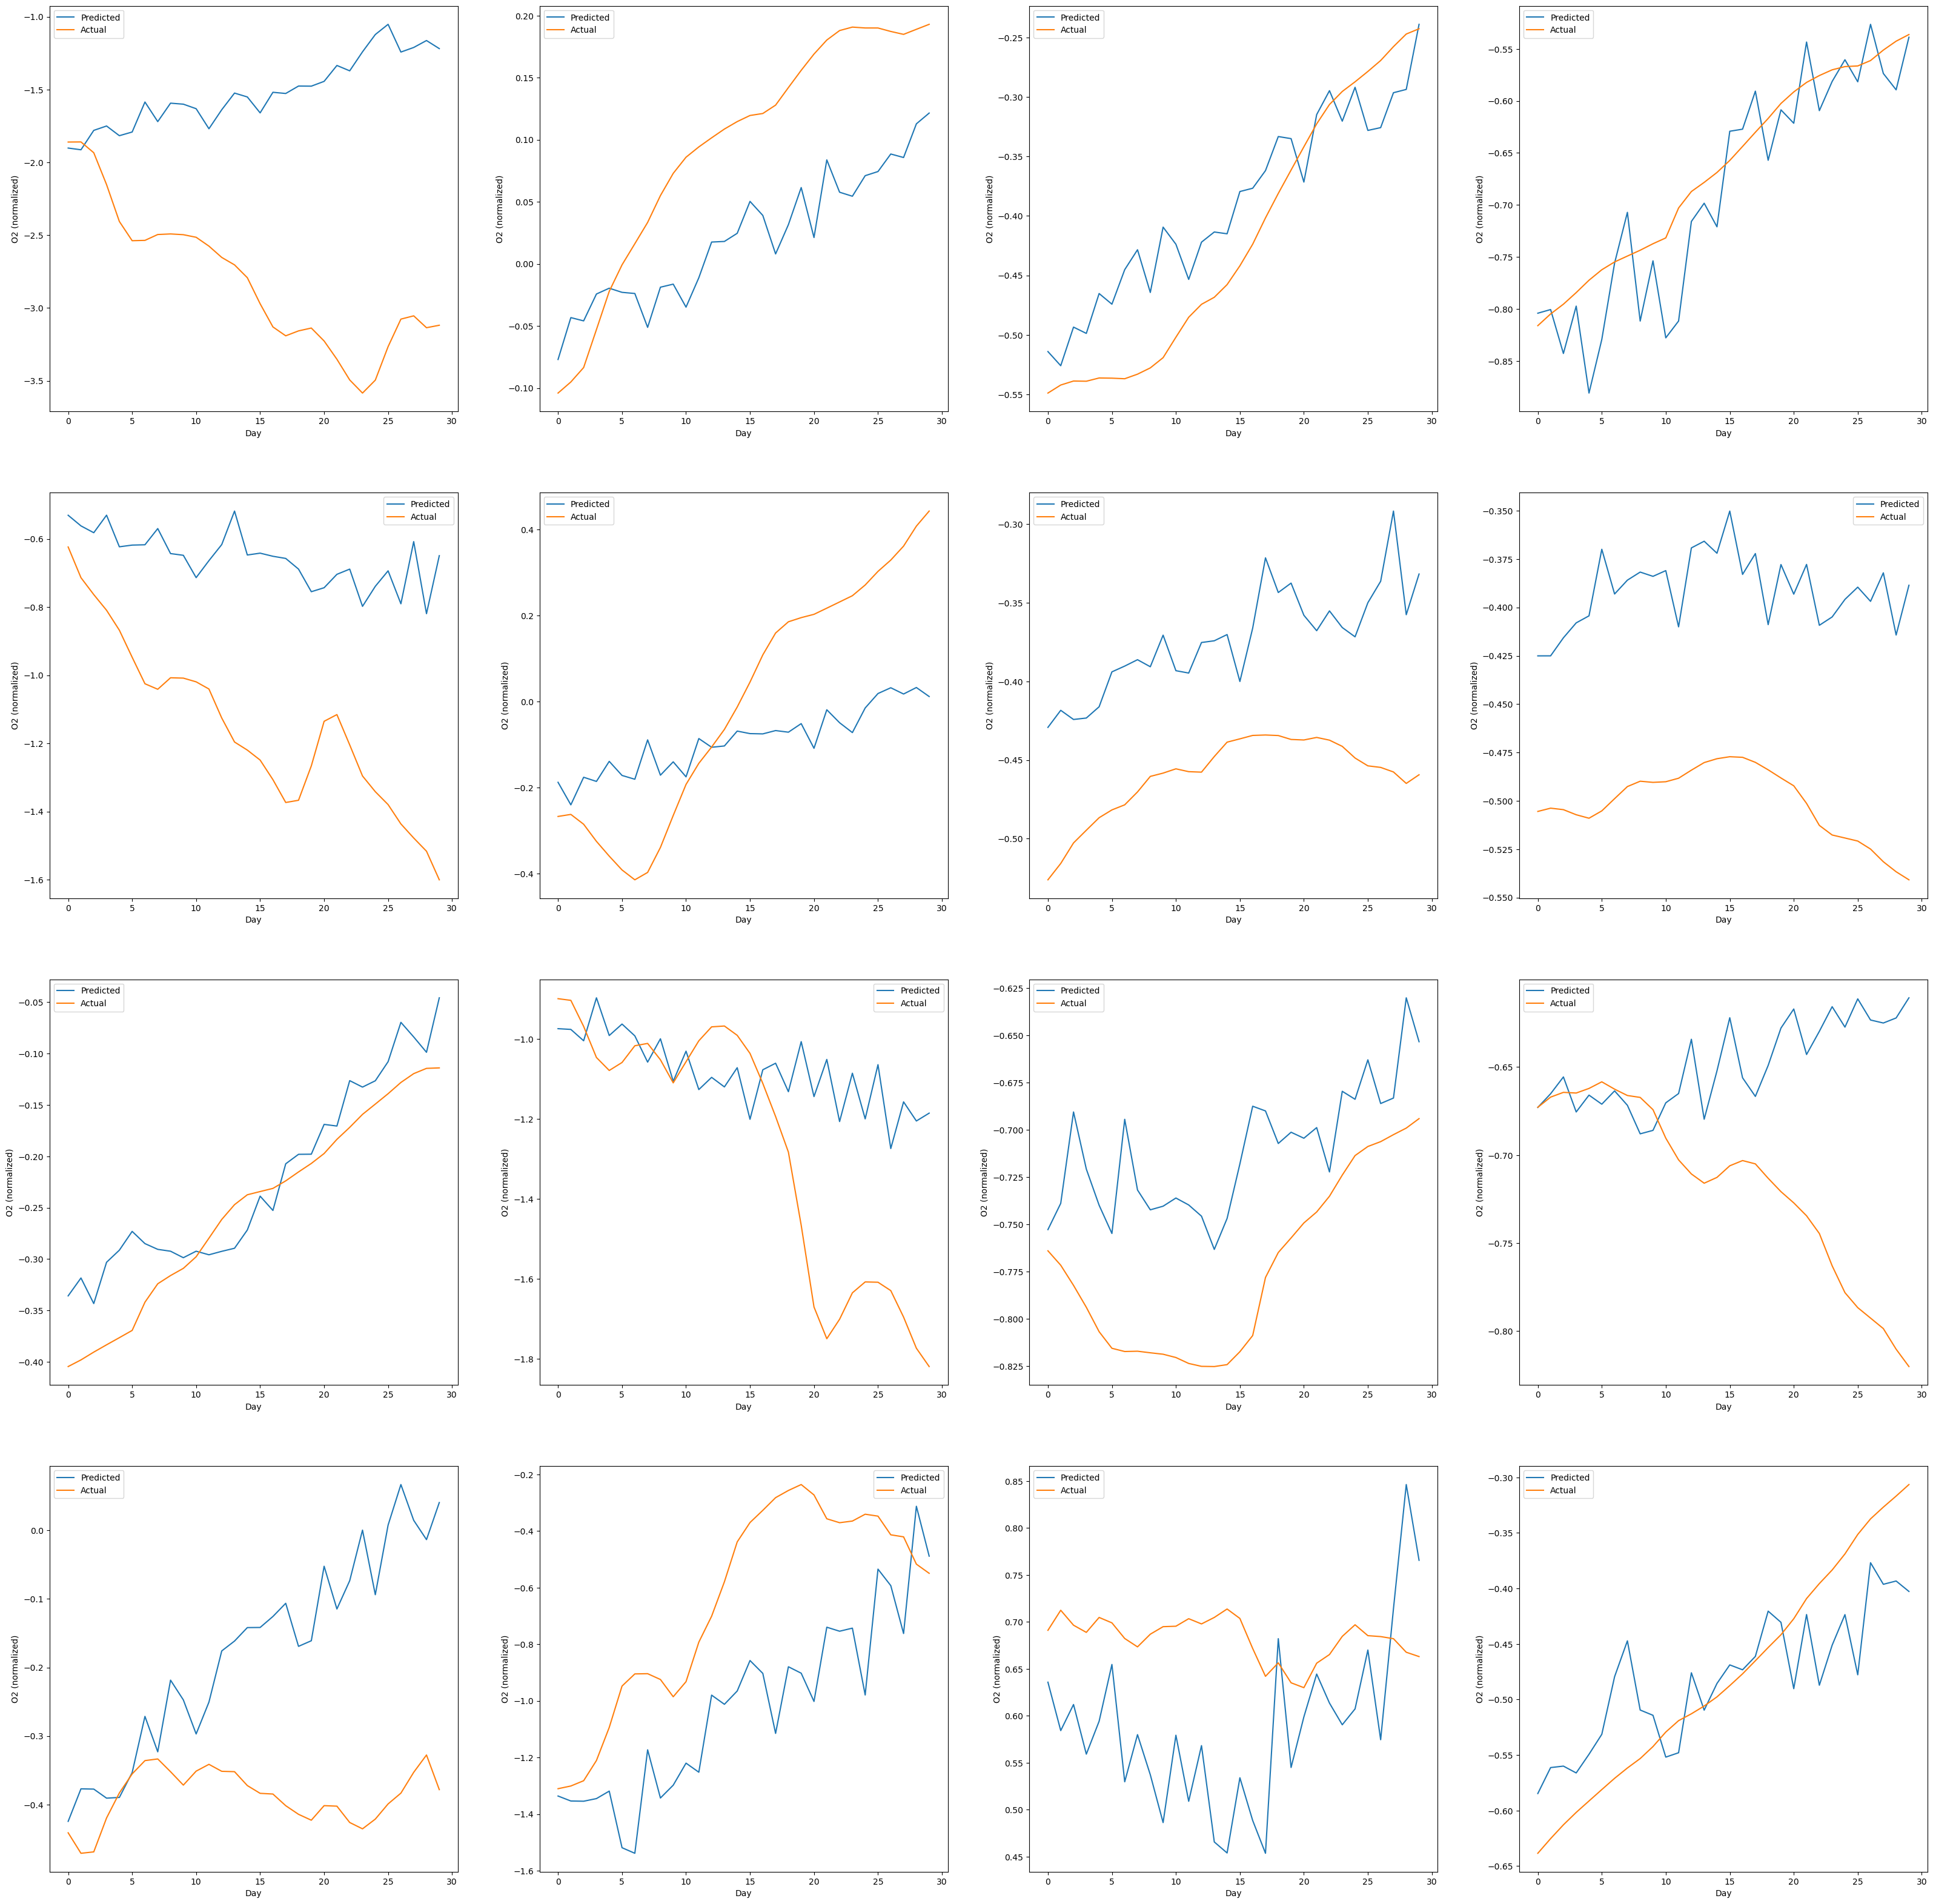

In [18]:
fig, axes = plt.subplots(4, 4, figsize=(40,40))
for i in range(16):
    num = np.random.randint(low=0, high=n)
    true = y_test.iloc[num]
    o2_true = true[[f'o2_lead_{i}' for i in range(1,31)]]
    pred = model.predict([X_test.iloc[num]])
    o2_pred = pred[:, [6 + 7*i for i in range(30)]]
    
    ax = axes[i // 4][i % 4]
    ax.plot(range(30), o2_pred[0], label='Predicted')
    ax.plot(range(30), o2_true, label='Actual')
    
    ax.set_xlabel('Day')
    ax.set_ylabel('O2 (normalized)')
    ax.legend()

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [19]:
errors = [None] * 30

In [20]:
y_pred = model.predict(X_test)

In [21]:
y_pred

array([[-0.49676983, -0.01833649,  1.68324288, ...,  0.01578073,
        -1.10846139,  1.30065218],
       [-0.24634919,  1.04038282,  2.52052305, ..., -0.08826026,
        -0.3710166 ,  0.58537675],
       [ 0.3525221 ,  2.23037049,  2.9301275 , ..., -0.18563881,
        -0.41863358, -1.00701083],
       ...,
       [ 0.03449367,  0.09946429,  0.01169002, ..., -0.11479039,
         0.69737297, -0.17732501],
       [ 0.66820593,  0.20827571, -0.06489055, ..., -0.20416452,
         1.0017638 , -0.36989832],
       [ 2.80179848,  0.83583023,  0.4380575 , ..., -0.09425187,
        -0.31925218, -0.44002451]])

In [22]:
for i in range(0,30):
    o2_true = y_test[f'o2_lead_{i+1}']
    o2_pred = y_pred[:, 6 + 7*i]
    error = np.sqrt(mean_squared_error(o2_true, o2_pred))
    errors[i] = error
    print(f'Day: {i+1}')
    print(f'Root mean squared error: {error:.5f}')

Day: 1
Root mean squared error: 0.09315
Day: 2
Root mean squared error: 0.11470
Day: 3
Root mean squared error: 0.13917
Day: 4
Root mean squared error: 0.15670
Day: 5
Root mean squared error: 0.17385
Day: 6
Root mean squared error: 0.18131
Day: 7
Root mean squared error: 0.20234
Day: 8
Root mean squared error: 0.20070
Day: 9
Root mean squared error: 0.21343
Day: 10
Root mean squared error: 0.22877
Day: 11
Root mean squared error: 0.22689
Day: 12
Root mean squared error: 0.23676
Day: 13
Root mean squared error: 0.24951
Day: 14
Root mean squared error: 0.26139
Day: 15
Root mean squared error: 0.26462
Day: 16
Root mean squared error: 0.28770
Day: 17
Root mean squared error: 0.29881
Day: 18
Root mean squared error: 0.30862
Day: 19
Root mean squared error: 0.31220
Day: 20
Root mean squared error: 0.31869
Day: 21
Root mean squared error: 0.31821
Day: 22
Root mean squared error: 0.32541
Day: 23
Root mean squared error: 0.33280
Day: 24
Root mean squared error: 0.33930
Day: 25
Root mean squared